# Taller 2
## **MODELOS ECONOMETRICOS Y SERIES DE TIEMPO**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

In [4]:
raw =  pd.read_stata(r'D:\BASE TALLER2.dta')
raw.columns = raw.columns.str.lower()     ## nombres de columnas a minusculas para guardar homogenidad
print("dimensones de la data = ", raw.shape)
raw.head()

dimensones de la data =  (1174, 46)


,lrsn,account,parcel_id,locationstreet,locationcity,taxingdistrict,legaldescription80char,acreage,saletransferdt,saleprice,memo_id,memodesc,minyearbuilt,maxyearbuilt,totalfinishedarea,stories,finsize,attgarsf,detgarsf,attcpsf,constfr,extdesc1,extdesc2,roofdesc,roofmatd,shutters,numbdrms,num2baths,num3baths,num4baths,num5baths,poolenclosure,pooltype,golfcourse,residentialwaterfront,residentialboatslip,residentialboatdock,owner1,owner2,attentionline,deliveryaddr,city,state,postalcd,saledate,year
0,62706,62706,22-40-37-001-000-00090-2,18961 SW CONNERS HWY,CANAL POINT,1001 - WESTERN 1 MSTU,MAYACA HOMESTIES TR 9,3.10,3/21/00,140000,NULL,NULL,1935,1935,2271,2,2271,NaN,NaN,NaN,oc,Conc block 12,Stucco,Gable-Hip,Comp sh 240-260#,NULL,3,0,2,0,0,NULL,POOL,NULL,NULL,NULL,NULL,"WATT, JAMES F III",,,6146 SUGAR LOAF LN,WEST PALM BEACH,FL,33411,"2,000.00",65.00
1,142114,142114,22-40-37-001-000-00021-0,18761 SW CONNERS HWY,CANAL POINT,1001 - WESTERN 1 MSTU,MAYACA HOMESITES TRS 2 & 3 (LESS SWLY 257.65')...,6.88,11/14/00,30000,NULL,NULL,1935,1935,1656,1,1656,NaN,NaN,NaN,oc,Wood siding,,Gable-Hip,Comp sh 240-260#,NULL,3,0,2,0,0,NULL,NULL,NULL,NULL,NULL,NULL,VANDERGRIFT ROY JR (ESTATE),,C/O WADE R.BYRD P.A.,11360 FORTUNE CIR E-7,WELLINGTON,FL,33414,"2,000.00",65.00
2,62703,62703,22-40-37-001-000-00060-8,18841 SW CONNERS HWY,CANAL POINT,1001 - WESTERN 1 MSTU,MAYACA HOMESITES TR 6,3.73,2/28/02,127000,NULL,NULL,1935,1935,1544,1,1544,NaN,NaN,NaN,oc,Stucco or wood,,Gable-Hip,Comp sh 240-260#,NULL,3,0,2,0,0,NULL,NULL,NULL,NULL,NULL,NULL,"MIRABAL, JULIO",,,18841 SW CONNORS HWY,CANAL POINT,FL,33438,"2,002.00",67.00
3,62703,62703,22-40-37-001-000-00060-8,18841 SW CONNERS HWY,CANAL POINT,1001 - WESTERN 1 MSTU,MAYACA HOMESITES TR 6,3.73,9/27/02,133000,NULL,NULL,1935,1935,1544,1,1544,NaN,NaN,NaN,oc,Stucco or wood,,Gable-Hip,Comp sh 240-260#,NULL,3,0,2,0,0,NULL,NULL,NULL,NULL,NULL,NULL,"MIRABAL, JULIO",,,18841 SW CONNORS HWY,CANAL POINT,FL,33438,"2,002.00",67.00
4,62708,62708,22-40-37-001-000-00110-8,19041 SW CONNERS HWY,CANAL POINT,1001 - WESTERN 1 MSTU,MAYACA HOMESITES TR 11,2.72,1/22/04,79900,NULL,NULL,1935,1935,2346,2,2346,NaN,NaN,NaN,oc,Wood siding,,Gable-Hip,Comp sh 240-260#,NULL,3,0,1,0,0,NULL,NULL,NULL,NULL,NULL,NULL,"TOLER, CHESTER R & TERRY L",,,16101 SW KANNER HWY,INDIANTOWN,FL,34956,"2,004.00",69.00


### Cargar los datos

In [5]:
raw.dtypes.value_counts()

object     27
int8        6
int16       4
int32       3
float32     3
float64     3
dtype: int64

### Limpieza y Transformaciones

In [6]:
data = raw.copy()

Correccion de campos que estan vacios y son string por NA

In [7]:
cols_str = (data.dtypes=="object")
cols_str = list(cols_str[cols_str==True].index)
print(cols_str)

['parcel_id', 'locationstreet', 'locationcity', 'taxingdistrict', 'legaldescription80char', 'saletransferdt', 'memo_id', 'memodesc', 'constfr', 'extdesc1', 'extdesc2', 'roofdesc', 'roofmatd', 'shutters', 'poolenclosure', 'pooltype', 'golfcourse', 'residentialwaterfront', 'residentialboatslip', 'residentialboatdock', 'owner1', 'owner2', 'attentionline', 'deliveryaddr', 'city', 'state', 'postalcd']


In [8]:
data[cols_str] = data[cols_str].replace(["","NULL"],pd.NA)

In [9]:
## fecha
data["saletransferdt"] = pd.to_datetime(data["saletransferdt"], format="%m/%d/%y")

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lrsn,"1,174.00","66,949.88","27,326.62","48,345.00","51,590.00","55,408.50","62,101.50","290,743.00"
account,"1,174.00","66,949.88","27,326.62","48,345.00","51,590.00","55,408.50","62,101.50","290,743.00"
acreage,"1,174.00",0.35,0.88,0.02,0.17,0.24,0.34,24.78
saleprice,"1,174.00","166,936.75","167,159.25","1,100.00","80,925.00","138,500.00","198,400.00","1,898,000.00"
minyearbuilt,"1,174.00","1,978.75",142.50,0.00,"1,983.00","1,989.00","2,000.00","2,011.00"
maxyearbuilt,"1,174.00","1,989.08",13.27,"1,925.00","1,983.00","1,989.00","2,000.00","2,011.00"
totalfinishedarea,"1,174.00","2,006.73",771.77,520.00,"1,490.00","1,903.00","2,346.00","8,484.00"
stories,"1,174.00",1.09,0.29,0.00,1.00,1.00,1.00,3.00
finsize,"1,174.00","1,969.82",745.53,272.00,"1,488.00","1,874.00","2,304.25","8,484.00"
attgarsf,973.00,480.22,132.32,160.00,420.00,462.00,529.00,"1,176.00"


In [11]:
freqNA = pd.concat([data.isnull().sum(), data.isnull().sum()/len(data)*100], axis=1).rename(columns={0:"freqNA", 1:"freqNA%"}).sort_values("freqNA", ascending=False)
freqNA = freqNA[freqNA['freqNA']>0]
freqNA


,freqNA,freqNA%
residentialboatslip,1172,99.83
attcpsf,1170,99.66
golfcourse,1167,99.40
attentionline,1158,98.64
detgarsf,1124,95.74
residentialboatdock,1120,95.40
residentialwaterfront,1111,94.63
owner2,960,81.77
poolenclosure,831,70.78
memo_id,779,66.35


In [12]:
data[cols_str].apply(pd.Series.nunique).sort_values(ascending=False)

parcel_id                 1005
locationstreet            1005
legaldescription80char    1005
owner1                     997
deliveryaddr               994
saletransferdt             444
owner2                     184
postalcd                    57
city                        27
roofmatd                    12
extdesc1                    12
attentionline               12
extdesc2                     9
memo_id                      5
memodesc                     5
taxingdistrict               4
constfr                      3
roofdesc                     3
locationcity                 2
state                        1
residentialwaterfront        1
residentialboatdock          1
residentialboatslip          1
golfcourse                   1
pooltype                     1
poolenclosure                1
shutters                     1
dtype: int64

In [13]:
for c in cols_str:
    print(c, len(data[c].value_counts(dropna=False)))

parcel_id 1005
locationstreet 1005
locationcity 2
taxingdistrict 4
legaldescription80char 1005
saletransferdt 444
memo_id 6
memodesc 6
constfr 4
extdesc1 13
extdesc2 10
roofdesc 3
roofmatd 12
shutters 2
poolenclosure 2
pooltype 2
golfcourse 2
residentialwaterfront 2
residentialboatslip 2
residentialboatdock 2
owner1 997
owner2 185
attentionline 13
deliveryaddr 994
city 27
state 1
postalcd 57


Revision de variables categoricas

In [14]:
cols_texto = ["parcel_id","locationstreet","legaldescription80char","owner1","owner2","attentionline","deliveryaddr"]   ## tienen informacion en texto no son categoricas

cols = data.drop(cols_texto,axis=1).dtypes[data.dtypes=="object"].index
for c in cols:
    print(c, dict(data[c].value_counts(dropna=False)))

locationcity {'HOBE SOUND': 1163, 'CANAL POINT': 11}
taxingdistrict {'3003 - SOUTHERN MSTU': 724, '9009 - SOUTH CENTRAL MSTU': 436, '1001 - WESTERN 1 MSTU': 11, '4300 - JUPITER ISLAND': 3}
memo_id {<NA>: 779, 'HD04': 295, 'HDFJ': 75, 'HDWI': 19, 'HCY6': 5, 'HUSV': 1}
memodesc {<NA>: 779, 'Hurricane Damage Adjusted 05': 295, 'HURR DAMAGE F & J NOT FIXED 06': 75, 'HURRICANE DMG WILMA FOR 06': 19, 'Changes-hurricane insp 2006': 5, 'HURRICANE SOUND VAL 05': 1}
constfr {'Concrete block': 761, 'Wood frame': 384, 'oc': 23, <NA>: 6}
extdesc1 {'Conc block 12': 684, 'Stucco or wood': 188, 'Wood siding': 104, 'Stucco': 98, 'Hardi-Plank Lap Siding': 57, 'Other': 21, 'Vinyl siding': 9, 'BV': 4, 'Alum siding': 3, 'Brick best': 3, 'Wood siding-clapboards': 1, <NA>: 1, 'Hardboard': 1}
extdesc2 {<NA>: 706, 'Stucco': 366, 'Conc block 12': 60, 'Stucco or wood': 11, 'Hardboard': 10, 'Wood siding': 10, 'Hardi-Plank Lap Siding': 6, 'Masonry': 2, 'Brick best': 2, 'Wood board & batten - economy': 1}
roofdesc 

In [15]:
#CALCULAMOS ANTIGUEDAD RESTANDO DE ESTE AÑO 2022 EL AÑO DE VENTA 
data["saledate"] = 2022 - data["saledate"]
#taxingdistrict	Distrito Fiscal

Creando **data** solo con los campos indicados por el taller para construccion del modelo

In [32]:
cols_tarea = """saleprice	Precio de venta de la propiuedad
acreage	Area de la propiedad en Acres
finsize	Area total de la casa en pies cuadrados
Numbdrms	Numero de habitaciones
num3baths	Numero de baños completos (con ducha)
num4baths	Numero de baños complets (con ducha y tina)
shutters	Prescencia de protección para ventanas
Pooltype	Presencia de piscina
residentialwaterfront	Casa frente a cuerpo de agua
residentialboatdock	Casa con muelle
residentialboatslip	Casa con muelle pequeño
Golfcourse	Casa en campo de golf
saledate	Año de venta de la propiead
stories	Historia
taxingdistrict	Distrito Fiscal
City	Ciudad de localización de la vivienda"""
cols_tarea = pd.DataFrame([x.split("\t") for x in cols_tarea.split("\n")]).rename(columns={0:"var", 1:"label"})
cols_tarea["var"] = cols_tarea["var"].str.lower()
cols_tarea = dict(cols_tarea.to_dict(orient="split")["data"])
cols_tarea

{'saleprice': 'Precio de venta de la propiuedad',
 'acreage': 'Area de la propiedad en Acres',
 'finsize': 'Area total de la casa en pies cuadrados',
 'numbdrms': 'Numero de habitaciones',
 'num3baths': 'Numero de baños completos (con ducha)',
 'num4baths': 'Numero de baños complets (con ducha y tina)',
 'shutters': 'Prescencia de protección para ventanas',
 'pooltype': 'Presencia de piscina',
 'residentialwaterfront': 'Casa frente a cuerpo de agua',
 'residentialboatdock': 'Casa con muelle',
 'residentialboatslip': 'Casa con muelle pequeño',
 'golfcourse': 'Casa en campo de golf',
 'saledate': 'Año de venta de la propiead',
 'stories': 'Historia',
 'taxingdistrict': 'Distrito Fiscal',
 'city': 'Ciudad de localización de la vivienda'}

Exploracion

In [17]:
#%%time
#sns.pairplot(data=data);

### Data para el modelado

In [134]:
cols_ix = ["parcel_id","saletransferdt"]
data_model = data[cols_ix+list(cols_tarea.keys())].sort_values(cols_ix, ascending=[True,False]).copy()
print(data_model.shape)
data_model.head()

(1174, 18)


,parcel_id,saletransferdt,saleprice,acreage,finsize,numbdrms,num3baths,num4baths,shutters,pooltype,residentialwaterfront,residentialboatdock,residentialboatslip,golfcourse,saledate,stories,taxingdistrict,city
49,01-39-41-001-000-00010-7,2000-02-04,189900,0.15,1849,3,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,9009 - SOUTH CENTRAL MSTU,HOBE SOUND
390,01-39-41-001-000-00040-1,2000-08-31,219000,0.16,2047,3,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,9009 - SOUTH CENTRAL MSTU,HOBE SOUND
391,01-39-41-001-000-00040-1,2000-08-31,219000,0.16,2047,3,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,9009 - SOUTH CENTRAL MSTU,HOBE SOUND
88,01-39-41-001-000-00140-0,2000-03-04,215000,0.15,1849,3,2,0,shutters,POOL,<NA>,<NA>,<NA>,<NA>,22.00,1,9009 - SOUTH CENTRAL MSTU,HOBE SOUND
139,01-39-41-001-000-00190-9,2000-03-31,184000,0.16,1849,3,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,9009 - SOUTH CENTRAL MSTU,HOBE SOUND


Analisis por fechas de venta/transferencia

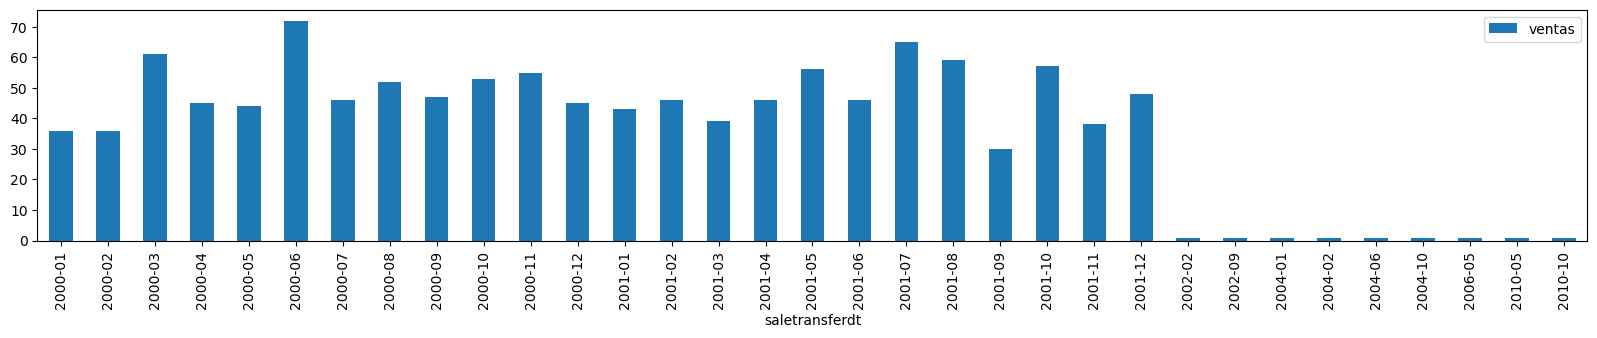

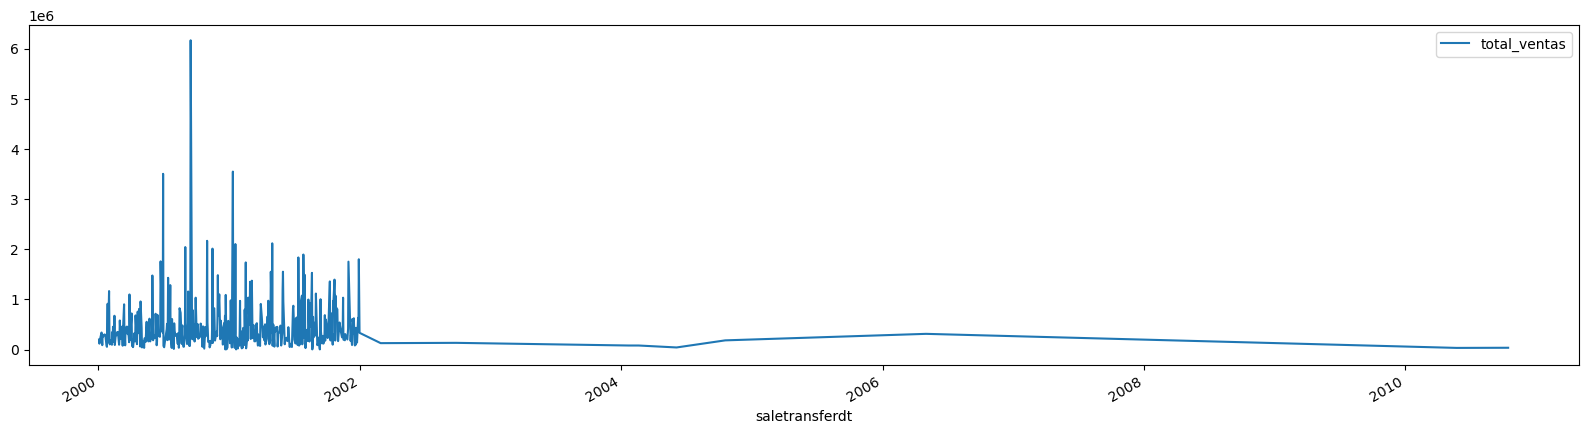

In [135]:
data_model.groupby(data_model['saletransferdt'].dt.to_period('M')).agg(ventas=("saletransferdt","size")).plot(kind="bar", figsize=(20,3))
data_model.groupby("saletransferdt").agg(total_ventas=("saleprice","sum")).plot(kind="line", figsize=(20,5))
plt.show()

Filtrando informacion por años 2000 y 2001, los otros no tienen consistencia.

In [136]:
print(data_model.shape)
filtro = data_model["saletransferdt"].dt.year<=2001
data_model = data_model[filtro]
print(data_model.shape)

(1174, 18)
(1165, 18)


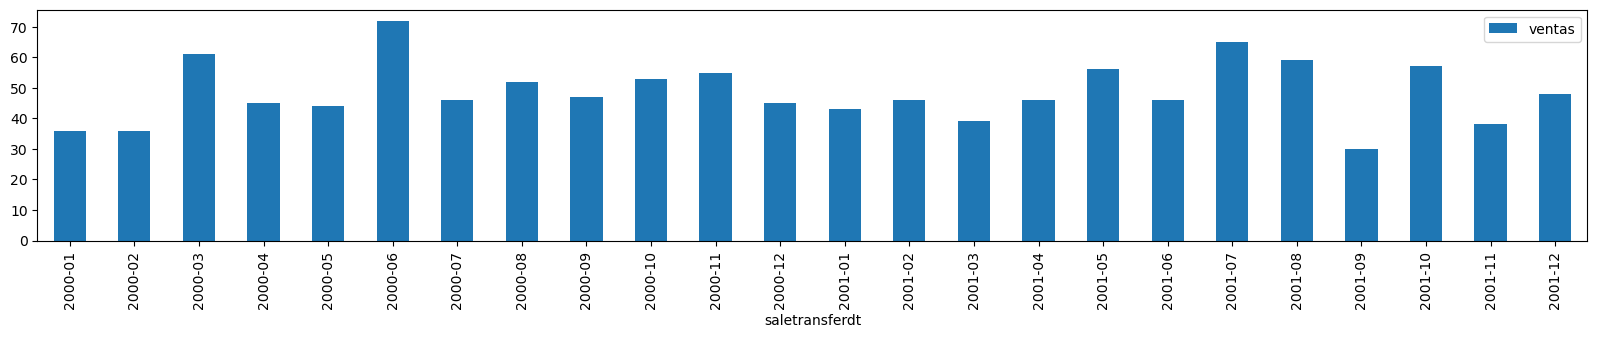

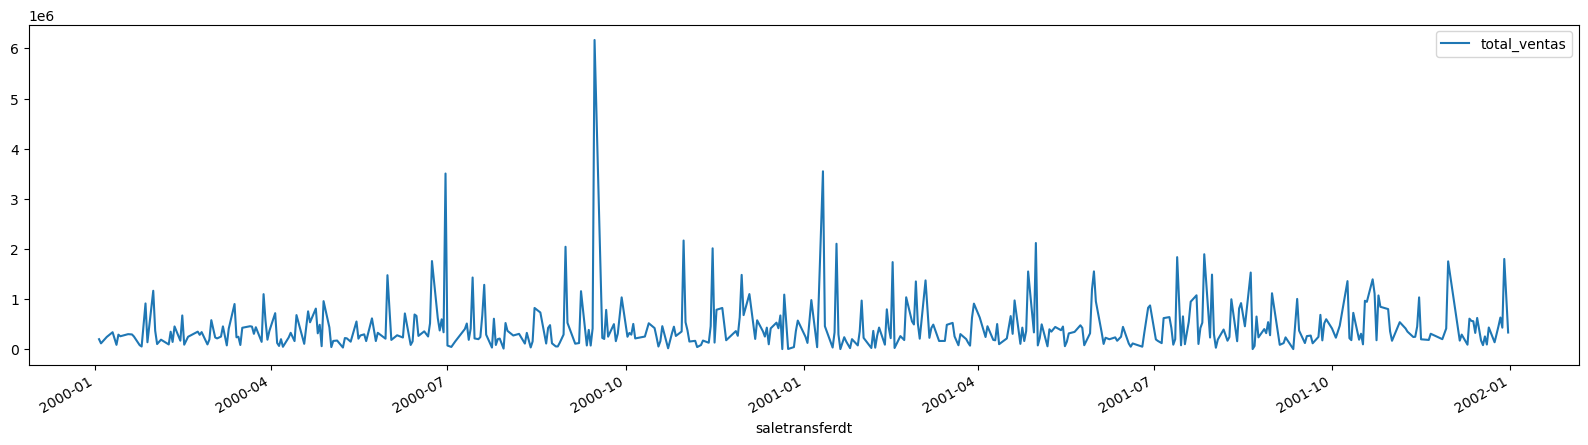

In [137]:
data_model.groupby(data_model['saletransferdt'].dt.to_period('M')).agg(ventas=("saletransferdt","size")).plot(kind="bar", figsize=(20,3))
data_model.groupby("saletransferdt").agg(total_ventas=("saleprice","sum")).plot(kind="line", figsize=(20,5))
plt.show()

Existen IDs duplicados, lo que indica que tenemos "casas" duplicadas

In [138]:
data_model["parcel_id"].value_counts()[data_model["parcel_id"].value_counts()>1]

34-38-42-030-054-01375-7    4
34-38-42-140-000-00340-1    4
34-38-42-026-000-00030-5    4
34-38-42-735-000-00820-0    4
34-38-42-017-018-00050-3    4
                           ..
34-38-42-029-022-04840-0    2
01-39-41-001-000-00040-1    2
34-38-42-725-000-00810-5    2
34-38-42-027-000-00870-7    2
34-38-42-017-020-00200-8    2
Name: parcel_id, Length: 142, dtype: int64

Revisando duplicidades

In [139]:
data_model[data_model["parcel_id"]=="34-38-42-030-054-01375-7"].apply(pd.Series.nunique).sort_values(ascending=False).head(10)

saleprice         2
saletransferdt    2
parcel_id         1
shutters          1
taxingdistrict    1
stories           1
saledate          1
city              1
num4baths         1
num3baths         1
dtype: int64

In [140]:
# un ejemplo
data_model[data_model["parcel_id"]=="34-38-42-030-054-01375-7"][['saletransferdt', 'saleprice', 'saledate']].sort_values("saletransferdt", ascending=False)

,saletransferdt,saleprice,saledate
475,2000-10-19,79900,22.00
476,2000-10-19,79900,22.00
75,2000-02-24,22500,22.00
76,2000-02-24,22500,22.00


Limpieza por duplicidades: se deja el registro mas reciente por **parcel_id** de acuerdo a la fecha de venta/transferencia

In [141]:
data_model = data_model.sort_values(['parcel_id','saletransferdt'], ascending=[True,False]).drop_duplicates(subset=["parcel_id"]).sort_index()
print(data_model.shape)
data_model["parcel_id"].value_counts(dropna=False).head() ## sin duplicados por parcel_id

(1001, 18)


22-40-37-001-000-00090-2    1
34-38-42-230-000-01250-8    1
27-39-42-005-000-00060-5    1
34-38-42-029-021-04620-0    1
01-39-41-001-000-04620-0    1
Name: parcel_id, dtype: int64

In [142]:
data_model = data_model.drop("saletransferdt",axis=1).set_index("parcel_id")
data_model.head()

,saleprice,acreage,finsize,numbdrms,num3baths,num4baths,shutters,pooltype,residentialwaterfront,residentialboatdock,residentialboatslip,golfcourse,saledate,stories,taxingdistrict,city
parcel_id,,,,,,,,,,,,,,,,
22-40-37-001-000-00090-2,140000,3.10,2271,3,2,0,<NA>,POOL,<NA>,<NA>,<NA>,<NA>,22.00,2,1001 - WESTERN 1 MSTU,WEST PALM BEACH
22-40-37-001-000-00021-0,30000,6.88,1656,3,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,1001 - WESTERN 1 MSTU,WELLINGTON
34-38-42-020-000-00740-2,120000,0.17,1473,2,2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,3003 - SOUTHERN MSTU,HOBE SOUND
34-38-42-029-003-00440-0,42500,0.28,2318,3,2,0,shutters,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,3003 - SOUTHERN MSTU,HOBE SOUND
34-38-42-029-006-01100-0,22000,0.40,2009,3,2,0,shutters,<NA>,<NA>,<NA>,<NA>,<NA>,22.00,1,3003 - SOUTHERN MSTU,HOBE SOUND


Revision de variables num baths

In [143]:
data_model.groupby(['num3baths','num4baths'],dropna=False).size()

num3baths  num4baths
0          1              3
           2              1
           5              1
1          0            128
           1              9
2          0            745
           1              8
           2              1
3          0             93
4          0             12
dtype: int64

Revision de variables categoricas

In [144]:
cols = data_model.dtypes[data_model.dtypes=="object"].index
for c in cols:
    print(c, len(data_model[c].unique()), dict(data_model[c].value_counts(dropna=False)))

shutters 2 {<NA>: 582, 'shutters': 419}
pooltype 2 {<NA>: 591, 'POOL': 410}
residentialwaterfront 2 {<NA>: 950, 'ResidentialWaterfront': 51}
residentialboatdock 2 {<NA>: 956, 'BOATD': 45}
residentialboatslip 2 {<NA>: 999, 'BOATSLIP': 2}
golfcourse 2 {<NA>: 995, 'GC': 6}
taxingdistrict 4 {'3003 - SOUTHERN MSTU': 619, '9009 - SOUTH CENTRAL MSTU': 379, '1001 - WESTERN 1 MSTU': 2, '4300 - JUPITER ISLAND': 1}
city 25 {'HOBE SOUND': 925, 'STUART': 35, 'TEQUESTA': 6, 'JUPITER': 5, 'VERO BEACH': 3, 'PALM CITY': 3, 'PALM BEACH GARDENS': 3, 'MIAMI': 2, 'LIGHTHOUSE POINT': 2, 'DEERFIELD BEACH': 2, 'WEST PALM BEACH': 1, 'PALM HARBOR': 1, 'BOCA RATON': 1, 'PARKLAND': 1, 'JENSEN BEACH': 1, 'PORT SALERNO': 1, 'LAKELAND': 1, 'ROYAL PALM BEACH': 1, 'PUNTA GORDA': 1, 'WELLINGTON': 1, 'BOKEELIA': 1, 'JACKSONVILLE': 1, 'NORTH PALM BEACH': 1, 'SARASOTA': 1, 'PORT SAINT LUCIE': 1}


In [145]:
data_model.groupby("city", dropna=False).agg(reg=("city","size"), total_saleprice=("saleprice","sum"), mean_saleprice=("saleprice","mean"), std_saleprice=("saleprice","std")).sort_values("reg", ascending=False)

,reg,total_saleprice,mean_saleprice,std_saleprice
city,,,,
HOBE SOUND,925,153954845,"166,437.67","151,489.90"
STUART,35,6329500,"180,842.86","107,606.24"
TEQUESTA,6,510900,"85,150.00","43,008.82"
JUPITER,5,530000,"106,000.00","96,638.53"
PALM CITY,3,253400,"84,466.67","6,372.07"
VERO BEACH,3,580600,"193,533.33","30,463.97"
PALM BEACH GARDENS,3,538000,"179,333.33","135,300.90"
DEERFIELD BEACH,2,348000,"174,000.00","97,580.74"
LIGHTHOUSE POINT,2,221400,"110,700.00",0.00


Para el modelo se usara si es la ciudad de ***HOBE SOUND*** u Otras, asi se reduce la dimensionalidad de la variable

In [146]:
data_model["city"] = data_model["city"].map({"HOBE SOUND":"HOBE SOUND"})
data_model.groupby("city", dropna=False).agg(reg=("city","size"), total_saleprice=("saleprice","sum"), mean_saleprice=("saleprice","mean"), std_saleprice=("saleprice","std")).sort_values("reg", ascending=False)

,reg,total_saleprice,mean_saleprice,std_saleprice
city,,,,
HOBE SOUND,925,153954845,"166,437.67","151,489.90"
NaN,76,12270200,"161,450.00","107,003.45"


In [147]:
data_model.groupby("taxingdistrict", dropna=False).agg(reg=("city","size"), total_saleprice=("saleprice","sum"), mean_saleprice=("saleprice","mean"), std_saleprice=("saleprice","std")).sort_values("reg", ascending=False)

,reg,total_saleprice,mean_saleprice,std_saleprice
taxingdistrict,,,,
3003 - SOUTHERN MSTU,619,97254845,"157,116.07","141,664.72"
9009 - SOUTH CENTRAL MSTU,379,66902200,"176,522.96","131,667.55"
1001 - WESTERN 1 MSTU,2,170000,"85,000.00","77,781.75"
4300 - JUPITER ISLAND,1,1898000,"1,898,000.00",NaN


In [148]:
data_model["taxingdistrict"] = data_model["taxingdistrict"].map({"3003 - SOUTHERN MSTU":"3003 - SOUTHERN MSTU"})
data_model.groupby("taxingdistrict", dropna=False).agg(reg=("city","size"), total_saleprice=("saleprice","sum"), mean_saleprice=("saleprice","mean"), std_saleprice=("saleprice","std")).sort_values("reg", ascending=False)

,reg,total_saleprice,mean_saleprice,std_saleprice
taxingdistrict,,,,
3003 - SOUTHERN MSTU,619,97254845,"157,116.07","141,664.72"
NaN,382,68970200,"180,550.26","158,182.16"


In [149]:
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("NaN","D0")
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("4300 - JUPITER ISLAND","D0")
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("1001 - WESTERN 1 MSTU","D0")
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("3003 - SOUTHERN MSTU","D1")
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("9009 - SOUTH CENTRAL MSTU","D2")

In [155]:
data_model["taxingdistrict"]

parcel_id
22-40-37-001-000-00090-2    NaN
22-40-37-001-000-00021-0    NaN
34-38-42-020-000-00740-2     D1
34-38-42-029-003-00440-0     D1
34-38-42-029-006-01100-0     D1
                           ... 
34-38-42-045-008-00161-6     D1
34-38-42-750-000-00980-7    NaN
34-38-42-027-000-00280-1     D1
26-39-42-004-008-00040-6     D1
27-39-42-005-000-01171-9     D1
Name: taxingdistrict, Length: 1001, dtype: object

In [154]:
data_model["taxingdistrict"]=data_model["taxingdistrict"].replace("NaN","D0")

Creando variables dummies para lass variables categoricas

In [156]:
data_model = pd.get_dummies(data_model, prefix_sep='__')
data_model.columns = data_model.columns.str.strip().str.replace(' ','_')
print(data_model.shape)
data_model.head()

(1001, 16)


,saleprice,acreage,finsize,numbdrms,num3baths,num4baths,saledate,stories,shutters__shutters,pooltype__POOL,residentialwaterfront__ResidentialWaterfront,residentialboatdock__BOATD,residentialboatslip__BOATSLIP,golfcourse__GC,taxingdistrict__D1,city__HOBE_SOUND
parcel_id,,,,,,,,,,,,,,,,
22-40-37-001-000-00090-2,140000,3.10,2271,3,2,0,22.00,2,0,1,0,0,0,0,0,0
22-40-37-001-000-00021-0,30000,6.88,1656,3,2,0,22.00,1,0,0,0,0,0,0,0,0
34-38-42-020-000-00740-2,120000,0.17,1473,2,2,0,22.00,1,0,0,0,0,0,0,1,1
34-38-42-029-003-00440-0,42500,0.28,2318,3,2,0,22.00,1,1,0,0,0,0,0,1,1
34-38-42-029-006-01100-0,22000,0.40,2009,3,2,0,22.00,1,1,0,0,0,0,0,1,1


In [157]:
data_model.describe().T

,count,mean,std,min,25%,50%,75%,max
saleprice,"1,001.00","166,058.99","148,544.70","1,100.00","85,000.00","140,000.00","198,700.00","1,898,000.00"
acreage,"1,001.00",0.31,0.48,0.02,0.16,0.23,0.33,6.88
finsize,"1,001.00","1,965.71",739.97,520.00,"1,488.00","1,874.00","2,282.00","8,484.00"
numbdrms,"1,001.00",2.86,0.70,0.00,2.00,3.00,3.00,6.00
num3baths,"1,001.00",1.97,0.55,0.00,2.00,2.00,2.00,4.00
num4baths,"1,001.00",0.03,0.23,0.00,0.00,0.00,0.00,5.00
saledate,"1,001.00",21.49,0.50,21.00,21.00,21.00,22.00,22.00
stories,"1,001.00",1.08,0.29,0.00,1.00,1.00,1.00,3.00
shutters__shutters,"1,001.00",0.42,0.49,0.00,0.00,0.00,1.00,1.00
pooltype__POOL,"1,001.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00


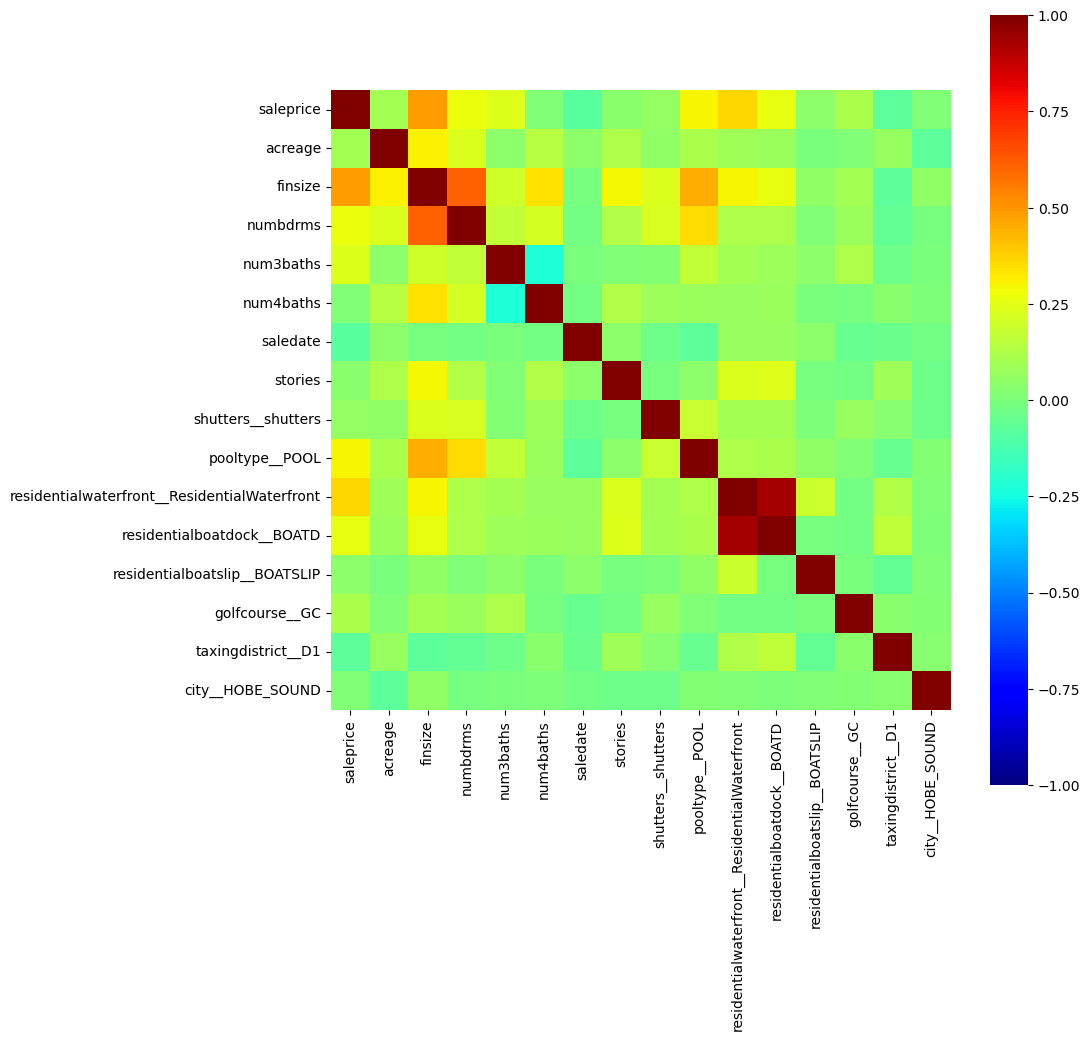

In [158]:
plt.figure(figsize=(10,10))
sns.heatmap(data_model.corr(), cmap='jet', square=True, vmin=-1, vmax=1)
plt.show()

### Modelado

In [159]:
target = "saleprice"


Funciones para validaciones:

In [160]:
def get_vif(df:pd.DataFrame,y:str):
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.api import add_constant

    df_ = df.copy()
    X = list(df_.drop(y,axis=1).columns)
    df_ = add_constant(df_).drop(y,axis=1)
    vif = dict()
    for x in X:
        i = list(df_.columns).index(x)
        vif.update({x: variance_inflation_factor(df_, i)})
    vif = pd.DataFrame.from_dict(vif, orient='index').rename(columns={0: 'VIF'})
    vif["1/VIF"] = 1/vif["VIF"]
    vif
    return vif

Modelo no restringido

In [161]:
Xvar = list(data_model.drop(target, axis=1).columns)
formula = target + " ~ " + " + ".join(Xvar)
formula


'saleprice ~ acreage + finsize + numbdrms + num3baths + num4baths + saledate + stories + shutters__shutters + pooltype__POOL + residentialwaterfront__ResidentialWaterfront + residentialboatdock__BOATD + residentialboatslip__BOATSLIP + golfcourse__GC + taxingdistrict__D1 + city__HOBE_SOUND'

In [162]:
mod1 = smf.ols(data=data_model, formula=formula)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     48.19
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.29e-106
Time:                        08:19:49   Log-Likelihood:                -13065.
No. Observations:                1001   AIC:                         2.616e+04
Df Residuals:                     985   BIC:                         2.624e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     4.974e+05   1.59e+05      3.129      0.002    1.85e+05    8.09e+05
acreage                                      -1.273e+04   8039.045     -1.583      0.114   -2.85e+04    3047.457
finsize                                         87.8080      7.644     11.487      0.000      72.808     102.808
numbdrms                                     -4906.9585   6690.250     -0.733      0.463    -1.8e+04    8221.823
num3baths                                     2.262e+04   7187.512      3.147      0.002    8512.140    3.67e+04
num4baths                                    -6.847e+04   1.78e+04     -3.838      0.000   -1.03e+05   -3.35e+04
saledate                                     -2.064e+04   7276.442     -2.836      0.005   -3.49e+04   -6357.945
stories                                      -6.712e+04   1.35e+04     -4.973      0.000   -9.36e+04   -4.06e+04
shutters__shutters                           -2.328e+04   7628.461     -3.052      0.002   -3.82e+04   -8309.026
pooltype__POOL                                2.934e+04   8394.289      3.496      0.000    1.29e+04    4.58e+04
residentialwaterfront__ResidentialWaterfront  7.259e+05   5.81e+04     12.495      0.000    6.12e+05     8.4e+05
residentialboatdock__BOATD                   -5.825e+05   6.01e+04     -9.684      0.000      -7e+05   -4.64e+05
residentialboatslip__BOATSLIP                -6.746e+05   9.91e+04     -6.809      0.000   -8.69e+05    -4.8e+05
golfcourse__GC                                1.323e+05   4.74e+04      2.794      0.005    3.94e+04    2.25e+05
taxingdistrict__D1                           -1.146e+04   7683.709     -1.491      0.136   -2.65e+04    3619.091
city__HOBE_SOUND                             -1.923e+04   1.37e+04     -1.401      0.161   -4.62e+04    7703.927
==============================================================================
Omnibus:                      809.529   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45528.515
Skew:                           3.239   Prob(JB):                         0.00
Kurtosis:                      35.398   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
pv = res1.pvalues[res1.pvalues<=0.05][1:]
pv

finsize                                        0.00
num3baths                                      0.00
num4baths                                      0.00
saledate                                       0.00
stories                                        0.00
shutters__shutters                             0.00
pooltype__POOL                                 0.00
residentialwaterfront__ResidentialWaterfront   0.00
residentialboatdock__BOATD                     0.00
residentialboatslip__BOATSLIP                  0.00
golfcourse__GC                                 0.01
dtype: float64

Modelo con correccion 1 de multicolinealidad

In [164]:
get_vif(df=data_model,y=target)

,VIF,1/VIF
acreage,1.14,0.88
finsize,2.48,0.40
numbdrms,1.68,0.60
num3baths,1.19,0.84
num4baths,1.28,0.78
saledate,1.03,0.98
stories,1.17,0.85
shutters__shutters,1.10,0.91
pooltype__POOL,1.32,0.76
residentialwaterfront__ResidentialWaterfront,12.64,0.08


la prueba nos indica que tenemos 2 variables que tienen multicolinialidad SEVERA: ***residentialwaterfront__ResidentialWaterfront*** y ***residentialboatdock__BOATD***

In [169]:
pd.crosstab(data_model["residentialwaterfront__ResidentialWaterfront"], data_model["residentialboatdock__BOATD"])

residentialboatdock__BOATD,0,1
residentialwaterfront__ResidentialWaterfront,,
0,950,0
1,6,45


In [173]:
## dejando por fuera del modelo la variablresidentialwaterfront__ResidentialWaterfronte residentialboatdock__BOATD
Xvar = list(data_model.drop([target,"residentialboatdock__BOATD"], axis=1).columns)
formula = target + " ~ " + " + ".join(Xvar)
formula

'saleprice ~ acreage + finsize + numbdrms + num3baths + num4baths + saledate + stories + shutters__shutters + pooltype__POOL + residentialwaterfront__ResidentialWaterfront + residentialboatslip__BOATSLIP + golfcourse__GC + taxingdistrict__D1 + city__HOBE_SOUND'

In [174]:
mod2 = smf.ols(data=data_model, formula=formula)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     41.07
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.28e-88
Time:                        08:21:47   Log-Likelihood:                -13110.
No. Observations:                1001   AIC:                         2.625e+04
Df Residuals:                     986   BIC:                         2.632e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     5.917e+05   1.66e+05      3.565      0.000    2.66e+05    9.17e+05
acreage                                      -1.019e+04   8404.338     -1.213      0.225   -2.67e+04    6299.412
finsize                                         95.6170      7.951     12.026      0.000      80.014     111.220
numbdrms                                     -7837.3951   6990.804     -1.121      0.263   -2.16e+04    5881.168
num3baths                                     2.133e+04   7516.815      2.838      0.005    6579.620    3.61e+04
num4baths                                    -7.881e+04   1.86e+04     -4.231      0.000   -1.15e+05   -4.23e+04
saledate                                     -2.466e+04   7598.712     -3.245      0.001   -3.96e+04   -9747.480
stories                                       -7.39e+04   1.41e+04     -5.242      0.000   -1.02e+05   -4.62e+04
shutters__shutters                           -2.511e+04   7976.886     -3.147      0.002   -4.08e+04   -9453.115
pooltype__POOL                                2.437e+04   8763.908      2.780      0.006    7167.620    4.16e+04
residentialwaterfront__ResidentialWaterfront  1.911e+05   1.89e+04     10.127      0.000    1.54e+05    2.28e+05
residentialboatslip__BOATSLIP                -1.442e+05   8.64e+04     -1.670      0.095   -3.14e+05    2.53e+04
golfcourse__GC                                1.283e+05   4.96e+04      2.590      0.010    3.11e+04    2.26e+05
taxingdistrict__D1                           -1.743e+04   8011.197     -2.176      0.030   -3.32e+04   -1709.801
city__HOBE_SOUND                             -1.804e+04   1.44e+04     -1.257      0.209   -4.62e+04    1.01e+04
==============================================================================
Omnibus:                      954.247   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80084.204
Skew:                           4.096   Prob(JB):                         0.00
Kurtosis:                      46.046   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
pv = res2.pvalues[res2.pvalues<=0.05][1:]
pv

finsize                                        0.00
num3baths                                      0.00
num4baths                                      0.00
saledate                                       0.00
stories                                        0.00
shutters__shutters                             0.00
pooltype__POOL                                 0.01
residentialwaterfront__ResidentialWaterfront   0.00
golfcourse__GC                                 0.01
taxingdistrict__D1                             0.03
dtype: float64

In [176]:
get_vif(df=data_model[[target]+Xvar], y=target)

,VIF,1/VIF
acreage,1.14,0.88
finsize,2.45,0.41
numbdrms,1.67,0.60
num3baths,1.19,0.84
num4baths,1.28,0.78
saledate,1.02,0.98
stories,1.17,0.86
shutters__shutters,1.10,0.91
pooltype__POOL,1.32,0.76
residentialwaterfront__ResidentialWaterfront,1.22,0.82


Modelo con correccion 2 de multicolinealidad + p-value<=0.05

In [177]:
Xvar = [x for x in Xvar if x in pv.index]
formula = target + " ~ " + " + ".join(Xvar)
formula

'saleprice ~ finsize + num3baths + num4baths + saledate + stories + shutters__shutters + pooltype__POOL + residentialwaterfront__ResidentialWaterfront + golfcourse__GC + taxingdistrict__D1'

In [178]:
mod3 = smf.ols(data=data_model, formula=formula)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.66
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.35e-90
Time:                        08:22:16   Log-Likelihood:                -13114.
No. Observations:                1001   AIC:                         2.625e+04
Df Residuals:                     990   BIC:                         2.630e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     5.775e+05   1.65e+05      3.508      0.000    2.54e+05       9e+05
finsize                                         88.9726      6.854     12.981      0.000      75.522     102.423
num3baths                                     2.075e+04   7507.982      2.764      0.006    6015.229    3.55e+04
num4baths                                    -7.979e+04   1.86e+04     -4.283      0.000   -1.16e+05   -4.32e+04
saledate                                     -2.539e+04   7594.100     -3.344      0.001   -4.03e+04   -1.05e+04
stories                                      -7.147e+04   1.41e+04     -5.081      0.000   -9.91e+04   -4.39e+04
shutters__shutters                           -2.506e+04   7939.466     -3.157      0.002   -4.06e+04   -9484.489
pooltype__POOL                                2.312e+04   8720.472      2.651      0.008    6007.624    4.02e+04
residentialwaterfront__ResidentialWaterfront  1.867e+05   1.85e+04     10.111      0.000     1.5e+05    2.23e+05
golfcourse__GC                                1.278e+05   4.96e+04      2.576      0.010    3.05e+04    2.25e+05
taxingdistrict__D1                           -1.773e+04   7954.012     -2.230      0.026   -3.33e+04   -2125.121
==============================================================================
Omnibus:                      952.395   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79265.670
Skew:                           4.086   Prob(JB):                         0.00
Kurtosis:                      45.822   Cond. No.                     9.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
res3.pvalues

Intercept                                      0.00
finsize                                        0.00
num3baths                                      0.01
num4baths                                      0.00
saledate                                       0.00
stories                                        0.00
shutters__shutters                             0.00
pooltype__POOL                                 0.01
residentialwaterfront__ResidentialWaterfront   0.00
golfcourse__GC                                 0.01
taxingdistrict__D1                             0.03
dtype: float64

In [180]:
get_vif(df=data_model[[target]+Xvar], y=target)

,VIF,1/VIF
finsize,1.81,0.55
num3baths,1.18,0.85
num4baths,1.28,0.78
saledate,1.02,0.98
stories,1.16,0.86
shutters__shutters,1.08,0.92
pooltype__POOL,1.30,0.77
residentialwaterfront__ResidentialWaterfront,1.16,0.86
golfcourse__GC,1.04,0.97
taxingdistrict__D1,1.05,0.95


## Prueba de Breusch-Pagan

In [181]:
#import statsmodels.api as sm
import statsmodels.stats.api as sms

In [182]:
nombres = ['estadística del multiplicador de Lagrange', 'valor p',
        'valor f', 'valor p f']
test = sms.het_breuschpagan (res1.resid, res1.model.exog)
pd.DataFrame(test,nombres)

,0
estadística del multiplicador de Lagrange,130.81
valor p,0.00
valor f,9.87
valor p f,0.00


Como el Valor-p=0 < 0,05 se rechazala hipotesis nula de que las varianzas son iguales por loque decimos que hay presencia de Heterocedasticidad.

### Corrigiendo el Módelo Tranformacion Ln

In [183]:
data_model[Xvar].describe().T

,count,mean,std,min,25%,50%,75%,max
finsize,"1,001.00","1,965.71",739.97,520.00,"1,488.00","1,874.00","2,282.00","8,484.00"
num3baths,"1,001.00",1.97,0.55,0.00,2.00,2.00,2.00,4.00
num4baths,"1,001.00",0.03,0.23,0.00,0.00,0.00,0.00,5.00
saledate,"1,001.00",21.49,0.50,21.00,21.00,21.00,22.00,22.00
stories,"1,001.00",1.08,0.29,0.00,1.00,1.00,1.00,3.00
shutters__shutters,"1,001.00",0.42,0.49,0.00,0.00,0.00,1.00,1.00
pooltype__POOL,"1,001.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
residentialwaterfront__ResidentialWaterfront,"1,001.00",0.05,0.22,0.00,0.00,0.00,0.00,1.00
golfcourse__GC,"1,001.00",0.01,0.08,0.00,0.00,0.00,0.00,1.00
taxingdistrict__D1,"1,001.00",0.62,0.49,0.00,0.00,1.00,1.00,1.00


In [184]:
import numpy as np

In [185]:
cols = [target, 'finsize']
for c in cols:
    data_model["ln__"+c] = np.log(data_model[c])

data_model[cols+["ln__"+c for c in cols]].head()

,saleprice,finsize,ln__saleprice,ln__finsize
parcel_id,,,,
22-40-37-001-000-00090-2,140000,2271,11.85,7.73
22-40-37-001-000-00021-0,30000,1656,10.31,7.41
34-38-42-020-000-00740-2,120000,1473,11.70,7.30
34-38-42-029-003-00440-0,42500,2318,10.66,7.75
34-38-42-029-006-01100-0,22000,2009,10.00,7.61


In [186]:
Xvar = ["ln__"+c for c in cols if c!=target] + [x for x in Xvar if x not in cols]
formula = "ln__" + target + " ~ " + " + ".join(Xvar)
formula

'ln__saleprice ~ ln__finsize + num3baths + num4baths + saledate + stories + shutters__shutters + pooltype__POOL + residentialwaterfront__ResidentialWaterfront + golfcourse__GC + taxingdistrict__D1'

In [187]:
mod5 = smf.ols(data=data_model, formula=formula)
res5 = mod5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ln__saleprice   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     28.32
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.38e-48
Time:                        08:22:58   Log-Likelihood:                -1183.2
No. Observations:                1001   AIC:                             2388.
Df Residuals:                     990   BIC:                             2442.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        8.0667      1.281      6.296      0.000       5.553      10.581
ln__finsize                                      0.8579      0.097      8.851      0.000       0.668       1.048
num3baths                                        0.1845      0.050      3.699      0.000       0.087       0.282
num4baths                                       -0.1718      0.118     -1.451      0.147      -0.404       0.061
saledate                                        -0.1241      0.051     -2.452      0.014      -0.223      -0.025
stories                                         -0.4208      0.093     -4.522      0.000      -0.603      -0.238
shutters__shutters                              -0.2603      0.053     -4.876      0.000      -0.365      -0.156
pooltype__POOL                                   0.1600      0.059      2.719      0.007       0.045       0.275
residentialwaterfront__ResidentialWaterfront     0.7180      0.122      5.888      0.000       0.479       0.957
golfcourse__GC                                   0.5310      0.330      1.608      0.108      -0.117       1.179
taxingdistrict__D1                              -0.0784      0.053     -1.474      0.141      -0.183       0.026
==============================================================================
Omnibus:                      488.353   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3295.750
Skew:                          -2.152   Prob(JB):                         0.00
Kurtosis:                      10.778   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prueba de Breusch-Pagan Para Módelo Corregido

In [188]:
nombres = ['estadística del multiplicador de Lagrange', 'valor p',
        'valor f', 'valor p f']
test = sms.het_breuschpagan (res5.resid, res5.model.exog)
pd.DataFrame(test,nombres)

,0
estadística del multiplicador de Lagrange,13.95
valor p,0.18
valor f,1.40
valor p f,0.18


In [179]:
#get_vif(df=data_model[[target]+Xvar], y=target)

Como el Valor-p=0.18 > 0,05 No se rechazala hipotesis nula de que las varianzas son iguales por l oque decimos que el módelotransformado  no Presenta Heterocedasticidad.